# Mudcard
- **Can we use the validation set for multiple times? What's the difference between the validation set and the test set?**
    - yes, you will use the validation set as many times as the training set because each model you train needs to be validated
    - in contrast, you only use the test set once at the very end of the ML pipeline once you found THE best model and you want to know how it performs on previously unseen data (generalization error)
- **I would like some more clarification on how Stratified Folds work, especially when it is combined with a KFold. Do we only use this strategy on imbalanced data?**
    - read the manuals on the sklearn website and check out the examples too.
    - stratification is only necessary when you work on an imbalanced classification problem
- **How do you classify and perform splits on imbalanced data that is continuous/non-categorical?**
    - you do not :)
    - if your target variable is continuous, that's a regression problem not a classification problem
    - you can plot the distribution of a continuous target variable and you might see that the distribution has a long tail
    - it will be one of the questions in the next problem set to figure out what you can do in that case
- **"what are classes and how are they different from the splitting of the data into training, testing, and validation**
    - in classification, your target variable is categorical, you have a small number of distinct classes to predict
    - for example: does the patient has cancer? Yes - class 1, No - class 0.
    - you split your whole dataset (feature matrix X and target variable y) when you do splitting
    - very different terms and this is basic stuff in ML so definitely read more about it or rewatch the lecture
- **When it comes to imbalanced data, some people also apply oversampling or undersampling techniques (e.g., SMOTE) on data, which I've been confused for years. Could you cover a little bit more about this in following lectures?**
    - yes, we will cover oversampling and undersampling towards the end of the term
    - I'm presonally not a big fan of these techniques and I'll explain why
- **why was random_state was set as 4 and 2 for stratified examples**
    - good catch! :)
    - when I set random state to those numbers, one of the sets won't have points from the minority class :) this doesn't happen with all random states!
    - try a bunch of random states and see what happens
- **How can we update our github automatically so the notes are in our folders when they are updated to the github classroom?**
    - check on Ed Discussion, someone asked this already and the TAs replied
- **I did not understand how you interpreted this: y = [0,0,0,2,2,0,0,2,0,1]. Can you explain this again?**
    - y is a target variable
    - there are ten points and three class labels (0, 1, 2)
    - you had to count how many points belong to class 0, class 1, and class 2
- **I do not feel confident with the k-fold method. I understood the diagram and how it was being split, but once we got to the code itself, the mechanics of the for loop threw me off. Additionally, I know we will visit the specifics later in the class, but I was having a hard time conceptualizing how the individual splits would be combined to create a single model.**
    - play around with the kfold code, add print statements, change arguments, etc
    - also read the sklearn manual and the examples provided on the sklearn website 

# Split non-iid data
By the end of this lecture, you will be able to
- split non-iid data based on group ID
- split non-iid time series data


## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
<span style="background-color: #FFFF00">**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)</span>
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Examples of non-iid data
- if there is any sort of time or group structure in your data, it is likely non-iid
    - **group structure:**
        - **samples are not identically distributed, $D$ might be different for each group**
        - a person appears multiple times in the dataset (e.g., hospital/doctor visits)
        - data is collected on multiple instrucments (e.g., equipment failure prediction)
    - **time series data**
        - **values are not independent**
        - stocks price
        - covid19 cases
        - weather data
        

## Ask yourself these questions!
- What is the intended use of the model? What is it supposed to do/predict?
- What data do you have available at the time of prediction?
- Your split must mimic the intended use of the model only then will you accurately estimate how well the model will perform on previously unseen points (generalization error).
- two examples:
    - if you want to predict the outcome of a new patient's visit to the ER:
        - your test score must be based on patients not included in training and validation
        - your validation score must be based on patients not included in training
        - points of one patient should not be distributed over multiple sets because your generalization error will be off
    - a youtube video was released 4 weeks ago and you want to predict if it will be featured a week from now, your training data should only contain info that will available upon predictions (stuff you know 4 weeks after release)
        - split data based on youtube vid ID
        - use info that's available 4 weeks after release
        - your classification label will be whether it was featured or not 5 weeks after release

# <font color='lightgray'>Split non-iid data</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- **split non-iid data based on group ID**
- <font color='lightgray'>split non-iid time series data</font>


# An example: seizure project
- you can read the publication [here](https://ieeexplore.ieee.org/document/8857552)
- classification problem:
   - epileptic seizures vs. non-epileptic psychogenic seizures
- data from empatica wrist sensor
   - heart rate, skin temperature, EDA, blood volume pressure, acceleration
- data collection:
   - patients come to the hospital for a few days
   - eeg and video recording to determine seizure type
   - wrist sensor data is collected
- question:
   - Can we use the wrist sensor data to differentiate the two seizure types on new patients?

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/seizure_data.csv')
print(df[df['patient ID'] == 32])

    patient ID            seizure_ID  ACC_mean  BVP_mean  EDA_mean    HR_mean  \
5           32  ID32__day3_arm_1_sz1  1.028539 -0.092102  0.112795  64.748167   
6           32  ID32__day3_arm_1_sz1  1.027986  0.745437  0.130486  63.715667   
7           32  ID32__day2_arm_1_sz0  1.002146  0.150810  0.189272  61.838500   
8           32  ID32__day2_arm_1_sz0  1.005410  0.482859  1.226038  66.240833   
9           32  ID32__day1_arm_1_sz0  0.997017 -0.925122  0.200990  56.103667   
10          32  ID32__day1_arm_1_sz0  1.009207  1.618456  1.679754  64.668167   
27          32  ID32__day1_arm_1_sz0  1.000290  0.046690  0.123165  54.289500   
28          32  ID32__day1_arm_1_sz0  1.010351  0.125039  0.471180  65.060667   
29          32  ID32__day2_arm_1_sz0  1.018163  0.254302  0.206010  61.875833   
30          32  ID32__day2_arm_1_sz0  1.016785  1.242893  0.954649  66.216167   
34          32  ID32__day3_arm_1_sz1  1.008867  0.070180  0.195966  65.995667   
35          32  ID32__day3_a

In [3]:
y = df['label']
patient_ID = df['patient ID']
seizure_ID = df['seizure_ID']
X = df.drop(columns=['patient ID','seizure_ID','label'])
classes, counts = np.unique(y,return_counts=True)
print(classes, counts)
print('balance:',np.max(counts/len(y)))

[0. 1.] [ 86 190]
balance: 0.6884057971014492


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,SVC())
    # the parameter(s) we want to tune
    param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [5]:
test_scores = []
for i in range(5):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*42,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))

{'svc__C': 1.0, 'svc__gamma': 0.01}
best CV score: 0.9227272727272726
test score: 0.9285714285714286
{'svc__C': 10.0, 'svc__gamma': 0.01}
best CV score: 0.9363636363636363
test score: 0.9285714285714286
{'svc__C': 10.0, 'svc__gamma': 0.01}
best CV score: 0.9045454545454547
test score: 0.9464285714285714
{'svc__C': 10.0, 'svc__gamma': 0.01}
best CV score: 0.9
test score: 0.9285714285714286
{'svc__C': 10.0, 'svc__gamma': 0.01}
best CV score: 0.9363636363636363
test score: 0.9107142857142857
test accuracy: 0.93 +/- 0.01


## This is wrong! A very bad case of data leakage!
- the textbook case of information leakage!
- if we just do KFold CV blindly, the points from the same patient end up in different sets
   - when you deploy the model and apply it to data from new patients, that patient's data will be seen for the first time
- the ML pipeline needs to mimic the intended use of the model!
   - we want to split the points based on the patient ID!
   - we want all points from the same patient to be in either train/CV/test

## Group-based split: GroupKFold
<center><img src="figures/groupkfold.png" width="600"></center>


In [6]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
def ML_pipeline_groups_GridSearchCV(X,y,groups,random_state,n_folds):
    # create a test set based on groups
    splitter = GroupShuffleSplit(n_splits=1,test_size=0.2,random_state=random_state)
    for i_other,i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
    # check the split
#     print(pd.unique(groups))
#     print(pd.unique(groups_other))
#     print(pd.unique(groups_test))
    # splitter for _other
    kf = GroupKFold(n_splits=n_folds)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,SVC())
    # the parameter(s) we want to tune
    param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other, groups=groups_other)
    return grid, grid.score(X_test, y_test)

In [7]:
test_scores = []
for i in range(5):
    grid, test_score = ML_pipeline_groups_GridSearchCV(X,y,patient_ID,i*42,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))

{'svc__C': 10.0, 'svc__gamma': 0.001}
best CV score: 0.7609139784946237
test score: 0.6410256410256411
{'svc__C': 0.1, 'svc__gamma': 0.01}
best CV score: 0.6522727272727272
test score: 0.2711864406779661
{'svc__C': 10.0, 'svc__gamma': 0.001}
best CV score: 0.5720073891625616
test score: 0.9390243902439024
{'svc__C': 10.0, 'svc__gamma': 0.001}
best CV score: 0.7061742424242425
test score: 0.43243243243243246
{'svc__C': 10000.0, 'svc__gamma': 0.001}
best CV score: 0.6082407407407406
test score: 0.8901098901098901
test accuracy: 0.63 +/- 0.26


## The takeaway
- an incorrect cross validation pipeline gives misleading results
   - usually the model appears to be pretty accurate
   - but the performance is poor when the model is deployed
- this can be avoided by a careful cross validation pipeline
   - think about how your model will be used
   - mimic that future use in CV

# Let's take a look at group splitters using toy datasets

## Group-based split: GroupKFold
<center><img src="figures/groupkfold.png" width="600"></center>


In [13]:
from sklearn.model_selection import GroupKFold
import numpy as np

X = np.ones(shape=(8, 2))
y = np.ones(shape=(8, 1))
groups = np.array([1, 1, 2, 2, 2, 3, 3, 3])

group_kfold = GroupKFold(n_splits=2)

for train_index, test_index in group_kfold.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [2 3 4] TEST: [0 1 5 6 7]
TRAIN: [0 1 5 6 7] TEST: [2 3 4]


In [9]:
help(GroupKFold)

Help on class GroupKFold in module sklearn.model_selection._split:

class GroupKFold(GroupsConsumerMixin, _BaseKFold)
 |  GroupKFold(n_splits=5)
 |  
 |  K-fold iterator variant with non-overlapping groups.
 |  
 |  Each group will appear exactly once in the test set across all folds (the
 |  number of distinct groups has to be at least equal to the number of folds).
 |  
 |  The folds are approximately balanced in the sense that the number of
 |  distinct groups is approximately the same in each fold.
 |  
 |  Read more in the :ref:`User Guide <group_k_fold>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  Notes
 |  -----
 |  Groups appear in an arbitrary order throughout the folds.
 |  
 |  Examples
 |  --------
 |  >>> import numpy as np
 |  >>> from sklearn.model_selection import GroupKFold
 |  >>> X = np.array([[1

## Group-based split: GroupShuffleSplit
<center><img src="figures/groupshufflesplit.png" width="600"></center>


In [11]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=0)

for train_idx, test_idx in gss.split(X, y, groups):
    print("TRAIN:", train_idx, "TEST:", test_idx)


TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [0 1 5 6 7] TEST: [2 3 4]
TRAIN: [0 1 5 6 7] TEST: [2 3 4]
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [2 3 4 5 6 7] TEST: [0 1]
TRAIN: [0 1 5 6 7] TEST: [2 3 4]


## Quiz 1
Go back to the GroupKFold example above. What happens when you change n_splits to 4? Why?

Why could we set the n_splits argument to 5 in GroupShuffleSplit? Check the manual of both methods to find the answer.

Explain your answer in a couple of sentences!

# <font color='lightgray'>Split non-iid data</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- <font color='lightgray'>split non-iid data based on group ID</font>
- **split non-iid time series data**


## Data leakage in time series data is similar!
- do NOT use information in CV which will not be available once your model is deployed
   - don't use future information!
   
<center><img src="figures/timeseriessplit.png" width="600"></center>


## Time series data
- stock price, crypto price, covid-19 positive case counts, etc
- simple data structure:

| time | observation | 
| - | :-: |
| t_0 | y_0 |
| t_1 | y_1 |
| t_2 | y_2 |
| ... | ... |
| t_i | y_i |
| ... | ... |
| t_n-1 | y_n-1 |
| t_n | y_n |

- assumption:
    - the difference between two time points (dt) is constant 
    - e.g., 1 minute, 5 minutes, 1 hour, or 1 day

## Autocorrelation
- the correlation of the time series data with a delayed copy of itself
- delay on the x axis, correlation coefficient on the y axis
- if delay = 0, the correlation coefficient is 1
- if the delay is short, autocorrelation can be high
- autocorrelation tends to subside for longer delays
- let's check an example

(3650, 2)
         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


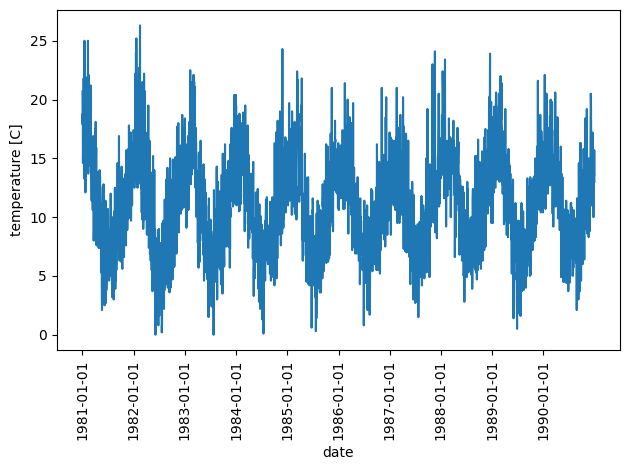

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('data/daily-min-temperatures.csv')
print(df.shape)
print(df.head())

plt.plot(df['Temp'])
plt.xticks(np.arange(len(df['Date']))[::365],df['Date'].iloc[::365],rotation=90)
plt.xlabel('date')
plt.ylabel('temperature [C]')
plt.tight_layout()
plt.show()


[0.99972603 0.77446147 0.63057611 0.58570362 0.5780733  0.57758888
 0.57542059 0.57472479 0.56812066 0.56190417]


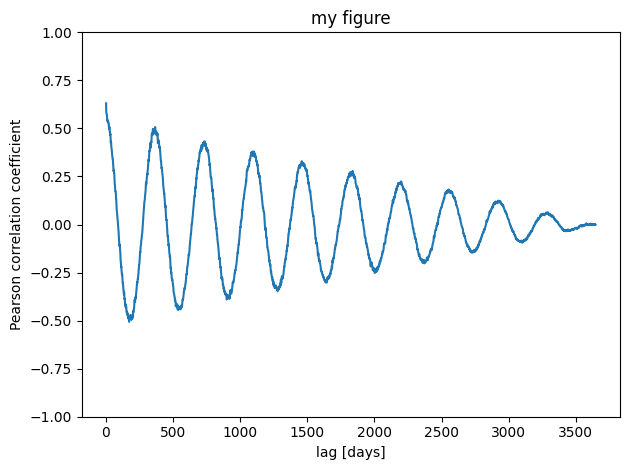

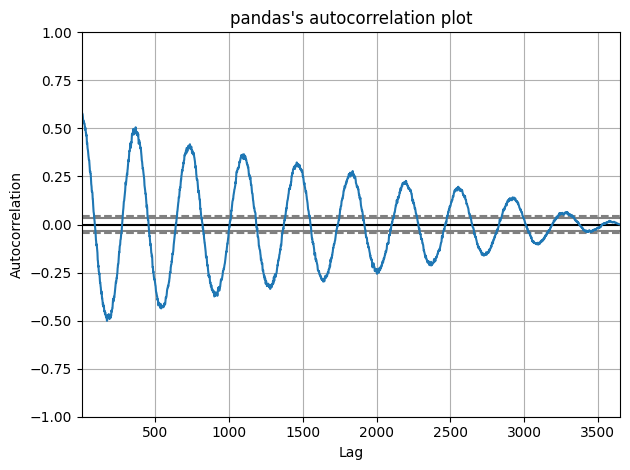

In [16]:
# let's create an autocorrelation plot

lags = np.arange(3650)
corr_coefs = np.zeros(3650)

for i in np.arange(len(lags)):
    x = df['Temp'].iloc[i:-1].reset_index(drop=True) # recent observations  
    y = df['Temp'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Temp'].shape[0]
print(corr_coefs[:10])

plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.title('my figure')
plt.tight_layout()
plt.show()

# a one-liner
pd.plotting.autocorrelation_plot(df['Temp'])
plt.title("pandas's autocorrelation plot")
plt.tight_layout()
plt.show()

In [25]:
df = pd.DataFrame({
    'Temp': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

lags = [1, 2, 3]

for i in np.arange(len(lags)):
    print(i)
    x = df['Temp'].iloc[i:-1].reset_index(drop=True)  # recent observations
    y = df['Temp'].iloc[:-i-1].reset_index(drop=True)  # lag-shifted observations
    
    print(f"For lag {lags[i]}:")
    print("x: ", end="")
    print(*x.tolist(), sep=", ")
    print("y: ", end="")
    print(*y.tolist(), sep=", ")
    print("\n")

0
For lag 1:
x: 1, 2, 3, 4, 5, 6, 7, 8, 9
y: 1, 2, 3, 4, 5, 6, 7, 8, 9


1
For lag 2:
x: 2, 3, 4, 5, 6, 7, 8, 9
y: 1, 2, 3, 4, 5, 6, 7, 8


2
For lag 3:
x: 3, 4, 5, 6, 7, 8, 9
y: 1, 2, 3, 4, 5, 6, 7




# Autoregression: create feature matrix using lag features
- goal:
    - predict what y will be dt in the future
- the target variable and lag features:

| feature_1     | feature_2 	| ... | feature_m-1 | feature m | <font color='red'>target variable</font>|
| - | :-: | :-: | :-: |:-: |:-: |
|     y_0       |    y_1      	| ... | y_m-1   	| y_m	    | <font color='red'>y_m+1</font>|
|     y_1       |    y_2      	| ... | y_m   	    | y_m+1	    | <font color='red'>y_m+2</font>|
|     ...       |    ...      	| ... | ...     	| ...	    | <font color='red'>...</font>  |
|     y_i-m     |    y_i-m+1   	| ... | y_i-2   	| y_i-1	    | <font color='red'>y_i</font>	|
|     ...       |    ...      	| ... | ...     	| ...	    | <font color='red'>...</font>	|
|     y_n-m     |    y_n-m+1   	| ... | y_n-2   	| y_n-1	    | <font color='red'>y_n</font>	|

- the features are shifted with respect to the original observation with a dt lag
- this feature matrix should still be split based on time (e.g., older observations in train, most recent observations in test)

In [12]:
y = df['Temp']
X = pd.concat([df['Temp'].shift(3),df['Temp'].shift(2),df['Temp'].shift(1)],axis=1)
X.columns = ['lag 3 days','lag 2 days','lag 1 day']
print(X.tail(10))
print(y.tail(10))

      lag 3 days  lag 2 days  lag 1 day
3640        14.7        15.4       13.1
3641        15.4        13.1       13.2
3642        13.1        13.2       13.9
3643        13.2        13.9       10.0
3644        13.9        10.0       12.9
3645        10.0        12.9       14.6
3646        12.9        14.6       14.0
3647        14.6        14.0       13.6
3648        14.0        13.6       13.5
3649        13.6        13.5       15.7
3640    13.2
3641    13.9
3642    10.0
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


## Things to consider
- lag between the target variable and feature m can be more if you want to predict the observation multiple dt's in the future
- you might also have multiple time series to work with (prices of multiple stock, covid cases in multiple countries, etc)
    - all of those need to be shifted by the same lag relative to the target variable
- due to autocorrelation, the features closer in time to the target variable tend to be more predictive
- how many features should you use?
    - treat the number of features as a hyperparameter

## Special scenarios
- what if dt is not consant and/or each time series have its own non-uniform time?
    - for example you try to predict crypto prices based on stock prices
        - stock prices are available once per hour
        - crypto prices are only available when a trade happens (i.e., some tokens are traded rarely)
- interpolate to a uniform time grid
    - try linear and non-linear interpolation techniques to figure out what works best
    - check out [scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) for more info
    - cubic spline interpolation usually works well
- you might have a mix of time series and non-time series features
    - cvs customer purchase history
        - you know what a customer bought and when - time series part
        - you have info on the customer (gender, race, address, etc) - non-time series part

## Mud card